**Problem 1: Zirconium Problem**

In [1]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import numpy as np

C:\Python\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
# reading the CSV file into pandas dataframe
df_LR = pd.read_csv("cubic_zirconia.csv").drop('Unnamed: 0',axis=1)  

In [5]:
df_LR.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df_LR.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [8]:
df_LR.shape

(26967, 10)

In [9]:
for i in df_LR.columns:
    # count number of rows with missing values
    n_miss = df_LR[i].isnull().sum()
    perc = n_miss / df_LR.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> carat, Missing: 0 (0.0%)
> cut, Missing: 0 (0.0%)
> color, Missing: 0 (0.0%)
> clarity, Missing: 0 (0.0%)
> depth, Missing: 697 (2.6%)
> table, Missing: 0 (0.0%)
> x, Missing: 0 (0.0%)
> y, Missing: 0 (0.0%)
> z, Missing: 0 (0.0%)
> price, Missing: 0 (0.0%)


In [10]:
df_LR.shape

(26967, 10)

In [11]:
for column in df_LR[['cut', 'color', 'clarity']]:
    print(column.upper(),': ',df_LR[column].nunique())
    print(df_LR[column].value_counts())
    print('\n*************************************************\n')

CUT :  5
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

*************************************************

COLOR :  7
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

*************************************************

CLARITY :  8
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

*************************************************



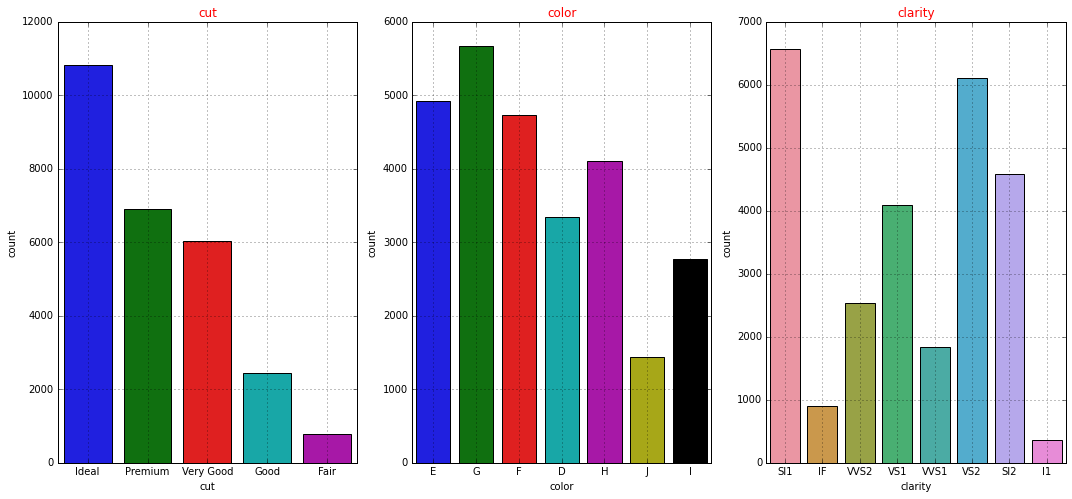

In [12]:
data_plot=df_LR[['cut', 'color', 'clarity']]
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

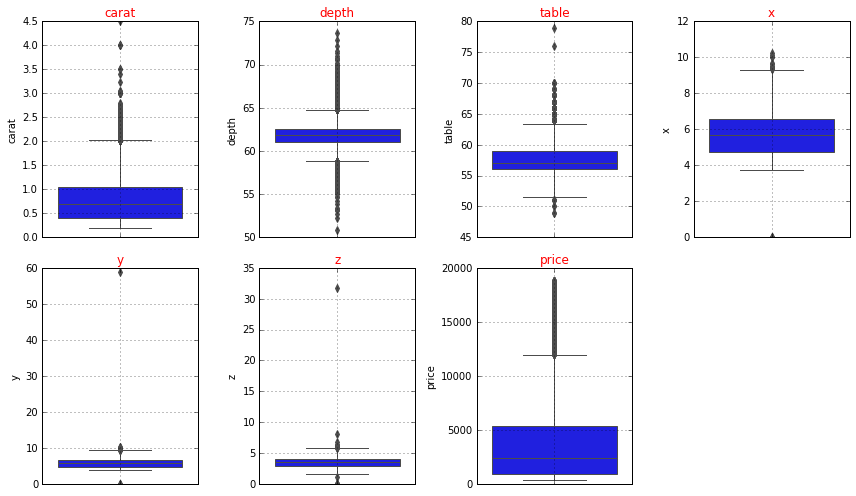

In [13]:
data_plot=df_LR[['carat','depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

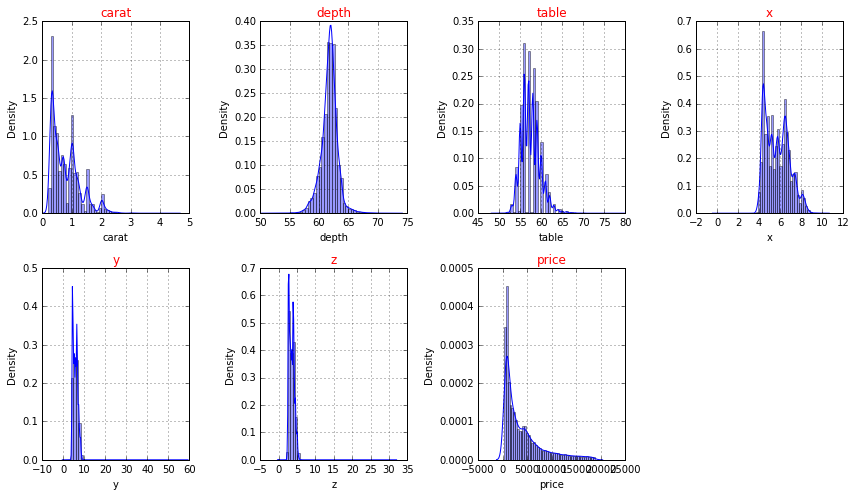

In [14]:
data_plot=df_LR[['carat','depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

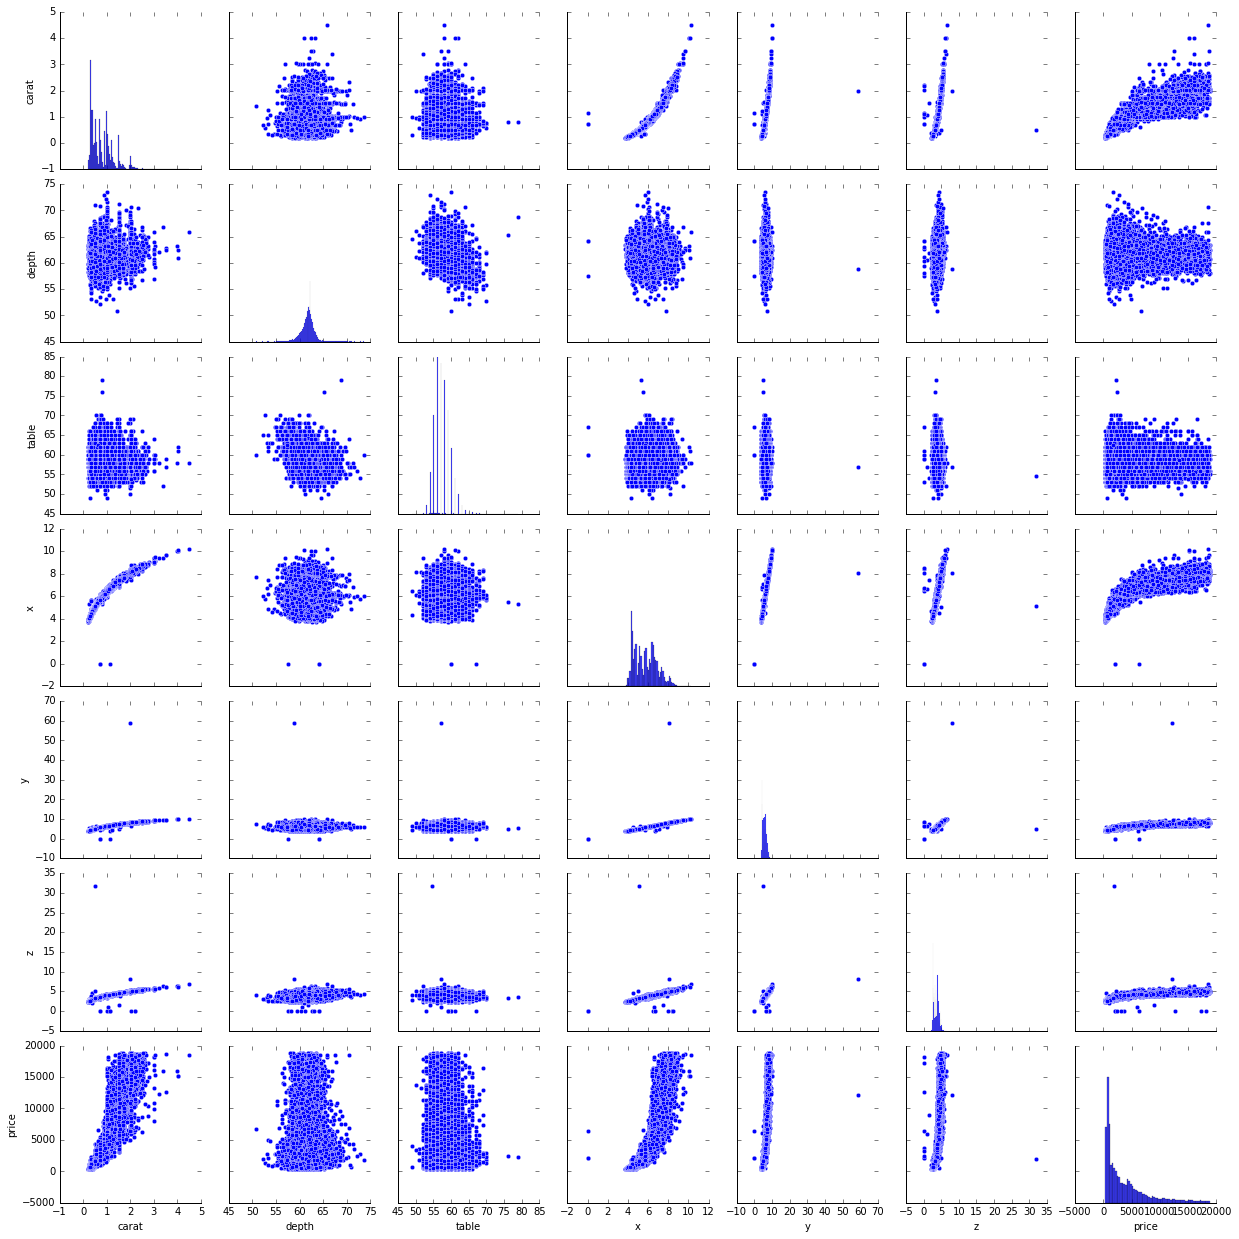

In [15]:
plt.figure(figsize=(10,10))
sns.pairplot(df_LR)
plt.show()

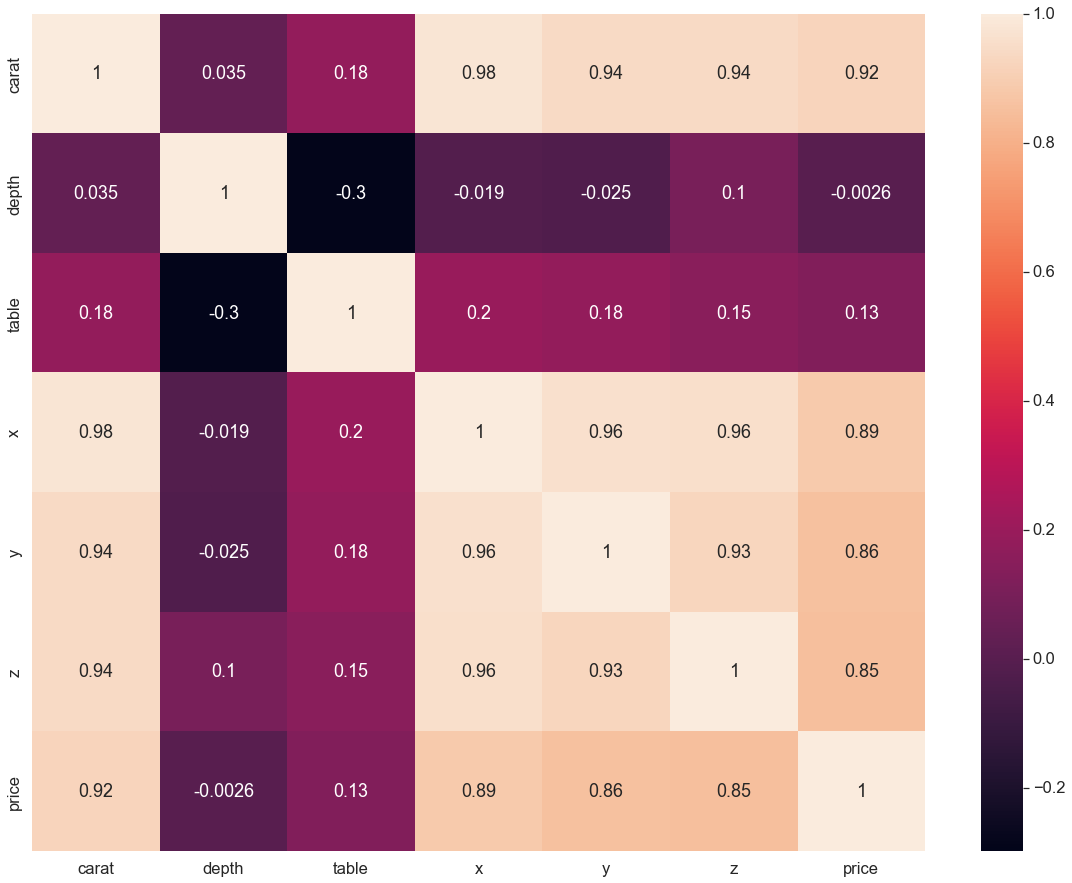

In [16]:
# construct heatmap with only continuous variables
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
corre=df_LR.corr()
sns.heatmap(corre,annot=True)
plt.show()

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(df_LR[['depth']])
Xtrans = imputer.transform(df_LR[['depth']])
Xtrans = imputer.fit_transform(df_LR[['depth']])
df_LR[['depth']] = pd.DataFrame(Xtrans)
df_LR.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [18]:
df_LR.duplicated().sum()
df_LR.drop_duplicates(inplace=True)
df_LR.duplicated().sum()

0

In [19]:
for feature in df_LR.columns: 
    if df_LR[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_LR[feature].unique()))
        print(pd.Categorical(df_LR[feature].unique()).codes)
        df_LR[feature] = pd.Categorical(df_LR[feature]).codes



feature: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


feature: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


feature: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


In [20]:
# Copy all the predictor variables into X dataframe. 
X = df_LR.drop('price', axis=1)
y = df_LR[['price']]

In [21]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [22]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [23]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11334.871925292742
The coefficient for cut is 61.13609057606334
The coefficient for color is -282.3279558988111
The coefficient for clarity is 290.80439964119887
The coefficient for depth is -153.6153582649673
The coefficient for table is -93.0158461315609
The coefficient for x is -1257.7208337611219
The coefficient for y is 4.417230255229015
The coefficient for z is -30.79709440939132


In [25]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 16477.58487594832


In [26]:

regression_model.score(X_train, y_train)

0.8866463978733947

In [27]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8891401672088223

In [28]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [29]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,4,4,5,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,2,1,5,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,2,3,2,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,3,2,3,61.1,62.0,6.54,6.49,3.98,4057


In [30]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z ', data = data_train).fit()
lm1.params

Intercept    16477.584876
carat        11334.871925
cut             61.136091
color         -282.327956
clarity        290.804400
depth         -153.615358
table          -93.015846
x            -1257.720834
y                4.417230
z              -30.797094
dtype: float64

In [31]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:43:06   Log-Likelihood:            -1.6264e+05
No. Observations:               18853   AIC:                         3.253e+05
Df Residuals:                   18843   BIC:                         3.254e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.648e+04    685.499     24.037      0.0

In [32]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [33]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

1349.365358828581

In [34]:
regression_model.score(X_train, y_train)

0.8866463978733947

In [35]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8891401672088223

In [36]:
y_pred = regression_model.predict(X_test)

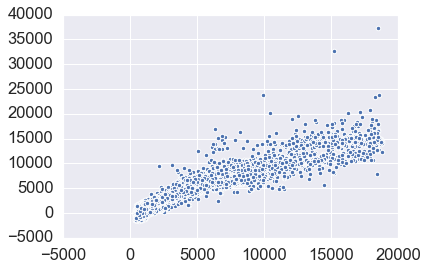

In [37]:
plt.scatter(y_test['price'], y_pred)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [40]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 74.83266469964308
cut ---> 7.46395541152295
color ---> 3.6706974214198342
clarity ---> 6.20452772751817
depth ---> 513.0299528822784
table ---> 514.2263691304604
x ---> 1030.7428796303461
y ---> 347.56650628061817
z ---> 330.75765583065527


**Problem 2: Holiday Package**

In [41]:
df=pd.read_csv('Holiday_Package.csv').drop('Unnamed: 0',axis=1)

In [42]:
df.shape

(872, 7)

In [43]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [45]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [48]:
df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [49]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

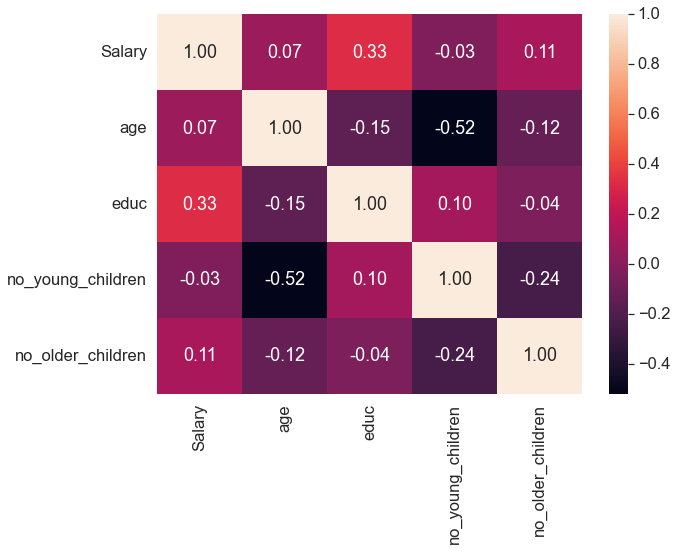

In [50]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.tight_layout()
plt.show()

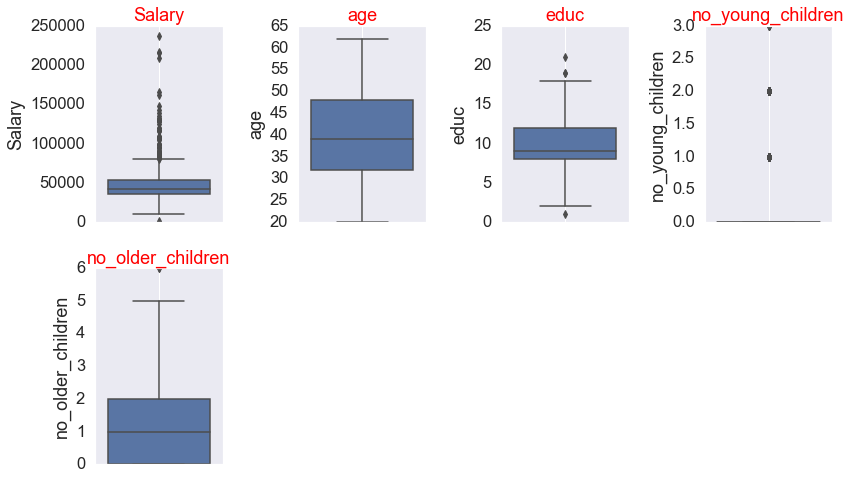

In [51]:
data_plot=df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

In [52]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [53]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [54]:
feature_list = df.columns

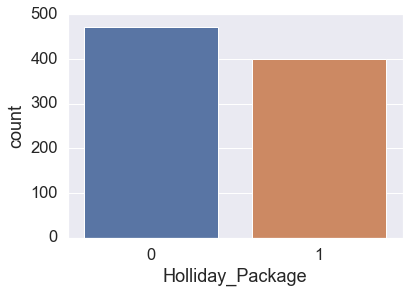

In [55]:
sns.countplot(df.Holliday_Package) 
plt.show()

In [56]:
feat=df.columns

In [57]:
feat

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [58]:
df1=df[['Holliday_Package','Salary', 'age', 'educ', 'no_young_children','no_older_children']]

In [59]:
df1

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children
0,0,48412,30,8,1,1
1,1,37207,45,8,0,1
2,0,58022,46,9,0,0
3,0,66503,31,11,2,0
4,0,66734,44,12,0,2
...,...,...,...,...,...,...
867,0,40030,24,4,2,1
868,1,32137,48,8,0,0
869,0,25178,24,6,2,0
870,1,55958,41,10,0,1


In [60]:
feat=feat[3:7]

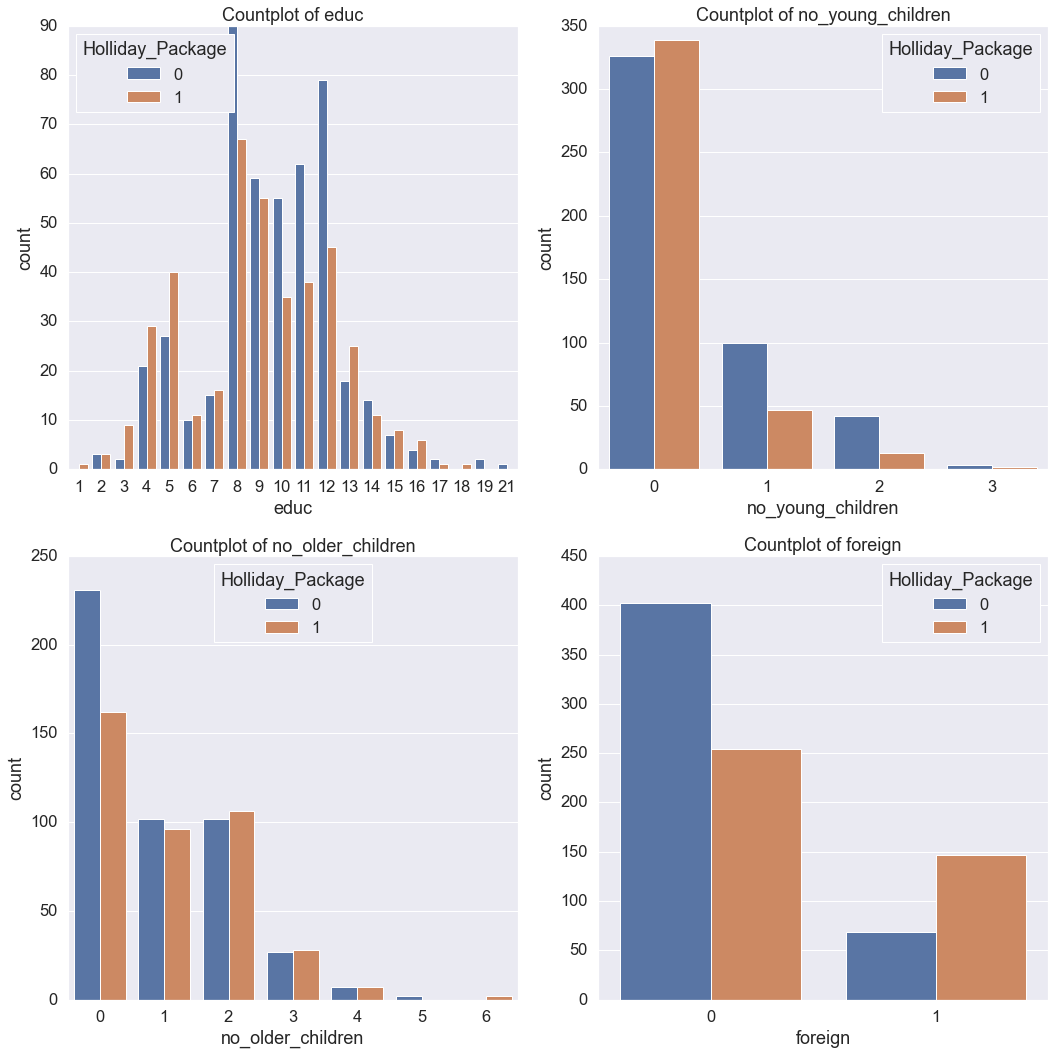

In [61]:
plt.figure(figsize = (15,15))
for i in range(len(feat)):
    #print(i)
    plt.subplot(2,2, i+1)
    sns.countplot(df[feat[i]],hue=df.Holliday_Package)
    plt.title('Countplot of {}'.format(feat[i]))
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

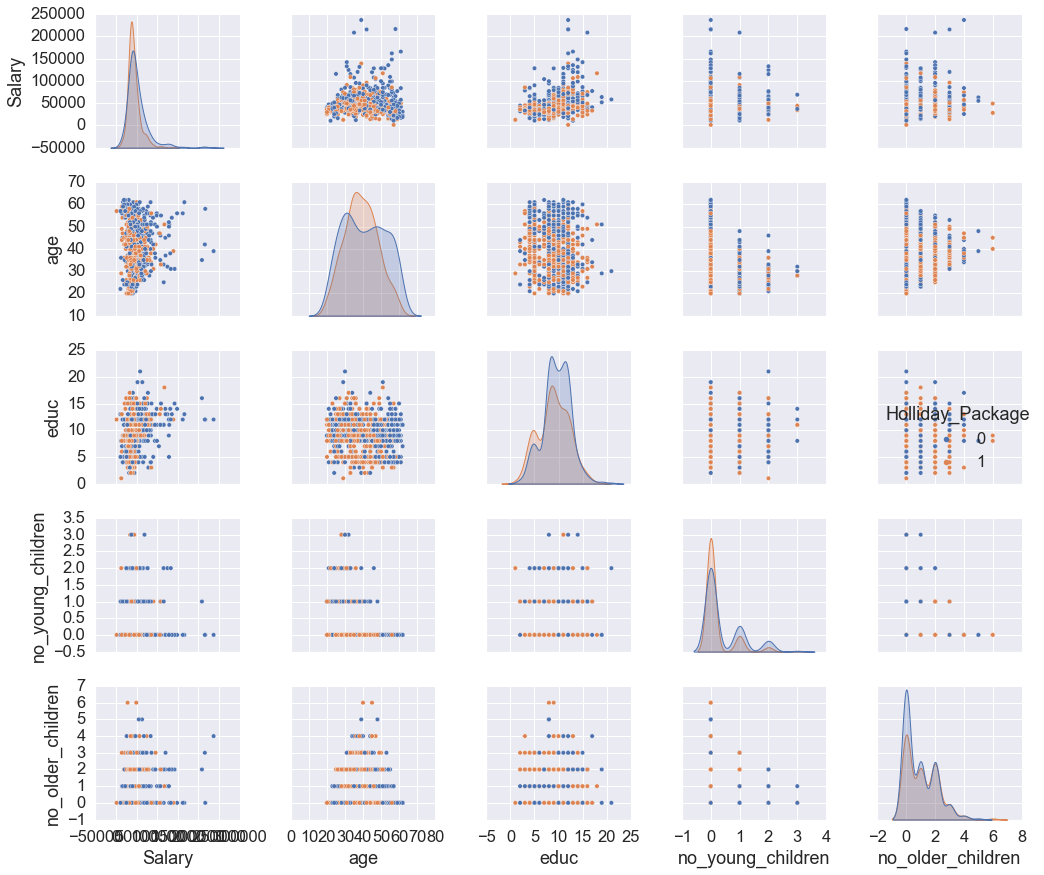

In [62]:
plt.figure(figsize = (10,8))
sns.pairplot(df1,hue='Holliday_Package')
plt.tight_layout()
plt.show()

In [63]:
# for i in feature_list: 
#      if df[i].dtype != 'object':
#          LL, UL = remove_outlier(df[i])
#          df[i] = np.where(df[i] > UL, UL, df[i])
#          df[i] = np.where(df[i] < LL, LL, df[i])

In [64]:
X = df.drop('Holliday_Package',axis=1)
Y = df.Holliday_Package

In [65]:
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

**Formulate a logistic regression model.**

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
y_predict = model.predict(X_test)

In [67]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5190839694656488


In [68]:
model.intercept_

array([0.00034862])

AUC: 0.580


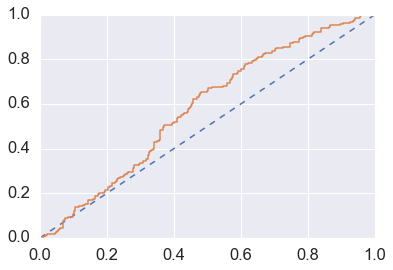

In [69]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

AUC: 0.575


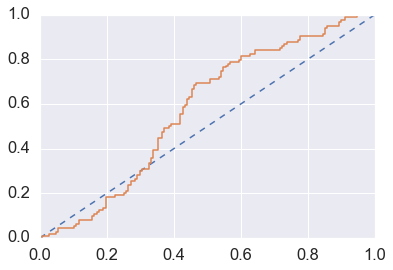

In [70]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [71]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[104  44]
 [ 82  32]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.70      0.62       148
           1       0.42      0.28      0.34       114

    accuracy                           0.52       262
   macro avg       0.49      0.49      0.48       262
weighted avg       0.50      0.52      0.50       262



In [72]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, ytrain_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, ytrain_predict))

Confusion Matrix 
 [[256  67]
 [222  65]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       323
           1       0.49      0.23      0.31       287

    accuracy                           0.53       610
   macro avg       0.51      0.51      0.47       610
weighted avg       0.52      0.53      0.48       610



In [73]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)


In [74]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list: 
    if df[i].dtype != 'object':
        LL, UL = remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

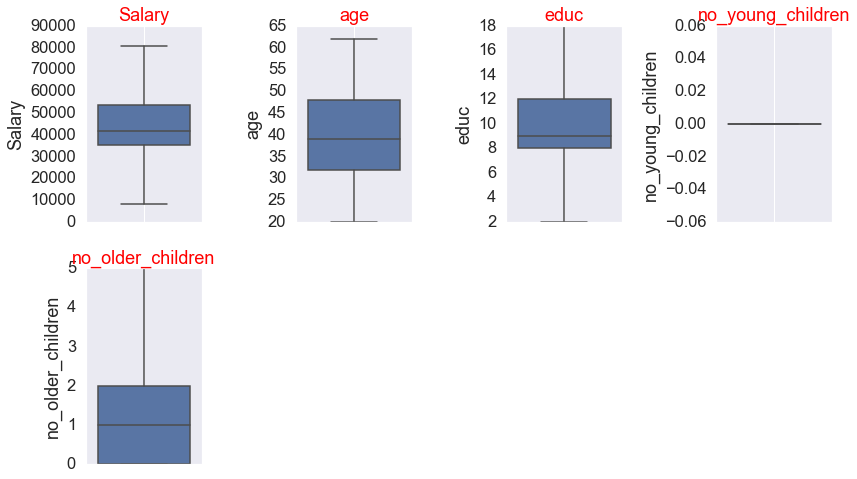

In [75]:
data_plot=df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

In [76]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train, y_train)
model

LinearDiscriminantAnalysis()

In [77]:
ytrain_predict = model.predict(X_train)
y_predict = model.predict(X_test) 

AUC: 0.740


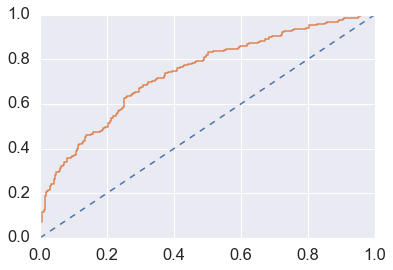

In [78]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

AUC: 0.722


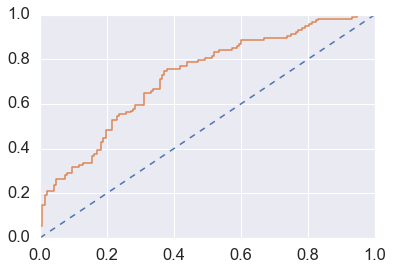

In [79]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [80]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[107  41]
 [ 48  66]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       148
           1       0.62      0.58      0.60       114

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262



In [81]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, ytrain_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, ytrain_predict))

Confusion Matrix 
 [[250  73]
 [128 159]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71       323
           1       0.69      0.55      0.61       287

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610

